# Jupyteronline은 SaaS 또는 구축 서비스를 통해 맞춤식 데이터과학자플랫폼을 제공합니다.  https://hub.jupyteronline.com

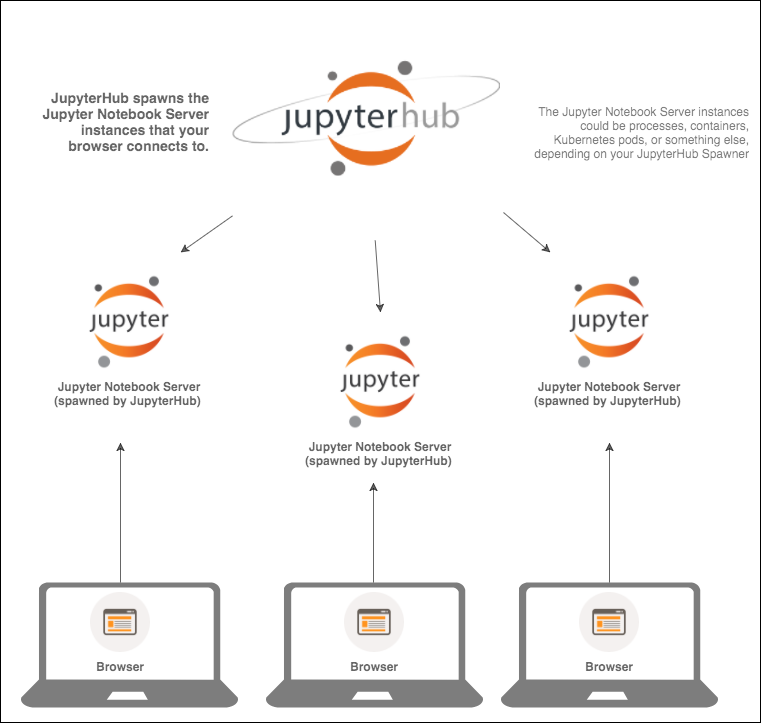

In [2]:
from IPython.display import Image
Image("jupyterhub.png")

## 연락처
### Email: jupyteronline@gmail.com

## 장점

1. Python 및 다양한 데이터과학 언어 제공 (예, Julia, R, C++)
2. 머신러닝/인공지능 모델링 개발 Framework 제공 (예,Tensorflow, Pytorch)
3. 데이터 수집/처리/분석 지원 (Iot 플랫폼으로 활용 가능)
4. 분산시스템(kubernetes)으로 구성되어 무한 확장 가능
5. GPU 지원
6. Bigdata 처리를 위해 Spark Cluster 연동
7. 사용자 인증 및 HTTPS 지원
8. BI 도구 지원

--------------------------------------------------------------------------------------------------

# Build Documentation Notebook

**Run this notebook** to create:
+ the code snippets in the documentation - in folder `./code-snippets`
+ the vue components displaying examples in the documentation - in folder `./example-vue-components`

These files are then copied in the folder `docs/content` and read during the VuePress build.

**Table of contents** : 

- 1 - [Sample Data](#1---Sample-Data)
- 2 - [Build Examples](#2---Build-Examples)
    - 2.1 - [Simple Grid](#2.1---Simple-Grid)
    - 2.2 - [Grid Size](#2.2---Grid-Size)
    - 2.3 - [Themes](#2.3---Themes)
    - 2.4 - [Custom CSS](#2.4---Custom-CSS)
    - 2.5 - [Export to CSV/Excel](#2.5---Export-to-CSV/Excel)
    - 2.6 - [Quick Filter](#2.6---Quick-Filter)
    - 2.7 - [Delete by Keypress](#2.7---Delete-by-Keypress)
    - 2.8 - [Edit Data](#2.8---Edit-Data)
    - 2.9 - [Index](#2.9---Index)
    - 2.10 - [MultiIndex](#2.10---MultiIndex)
    - 2.11 - [MultiOptions](#2.11---MultiOptions)
    - 2.12 - [Columns Size](#2.12---Columns-Size)
    - 2.13 - [Collapse/Expand](#2.13---Collapse-/-Expand-All)
    - 2.14 - [Highlight Cells](#2.14---Highlight-Cells)
    - 2.15 - [Custom Menu 1](#2.15---Custom-Menu-1)
    - 2.16 - [Custom Menu 2](#2.16---Custom-Menu-2)
    - 2.17 - [Paste from Excel](#2.17---Paste-from-Excel)
    - 2.18 - [Export Data](#2.18---Export-Data)
    - 2.19 - [Fancy Rendering](#2.19---Fancy-Rendering)
    - 2.20 - [Status Bar](#2.20---Status-Bar)
- 3 - [Build Files](#3---Build-Examples-Files)

In [5]:
import os
import shutil
import numpy as np
import pandas as pd
import urllib.request as ur
import simplejson as json
from ipyaggrid import Grid
from ipyaggrid import get_license

from ipyaggrid.magics import CustomMagics

In [6]:
folder_code = 'code-snippets'
if not os.path.exists(folder_code):
    os.makedirs(folder_code)
    
try:
    folder_code_copy = os.path.join('..', 'content', 'code-snippets')
    if not os.path.exists(folder_code_copy):
        os.makedirs(folder_code_copy)
except:
    pass

folder_vue = 'example-vue-components'
if not os.path.exists(folder_vue):
    os.makedirs(folder_vue)
    
try:
    folder_code_copy = os.path.join('..', 'content', '.vuepress', 'components')
    if not os.path.exists(folder_code_copy):
        os.makedirs(folder_code_copy)
except:
    pass
    
grid_export = []

## 1 - Sample Data

In [7]:
# Sampledata : meteorites impacts
jsonfile = 'meteorites.json'
with open(jsonfile) as res:
    meteorites = json.load(res)
dfm = pd.DataFrame(meteorites)
dfm.index = pd.Index(dfm['id'])
dfm = dfm.drop(['id'],axis=1)

# Data for Multiindex
def mklbl(prefix, n):
    return ["%s%s" % (prefix, i) for i in range(n)]

miindex = pd.MultiIndex.from_product([mklbl('A', 4),
                                      mklbl('B', 2),
                                      mklbl('C', 4),
                                      mklbl('D', 2)],
                                    names=['RowIdx-1', 'RowIdx-2', 'RowIdx-3', 'RowIdx-4'])
index  =['-'.join(col).strip() for col in miindex.values]
micolumns = pd.MultiIndex.from_tuples([('a', 'foo', 'zap'),
                                       ('a', 'foo', 'zip'),
                                       ('a', 'bar', 'zap'),
                                       ('a', 'bar', 'zip'),
                                       ('b', 'foo', 'zap'),
                                       ('b', 'foo', 'zep'),
                                       ('b', 'bah', 'zep'),
                                       ('b', 'bah', 'zyp'),
                                       ('b', 'bah', 'zap'),
                                      ],
                                      names=['ColIdx-{}'.format(i) for i in range(1, 4)])
cols  =['-'.join(col).strip() for col in micolumns.values]
data = np.arange(len(miindex) * len(micolumns), dtype=np.float).reshape((len(miindex),len(micolumns)))
data = data.tolist()


df = pd.DataFrame(data, index=miindex, columns=micolumns).sort_index().sort_index(axis=1)

# Sample data: Olympic winners
url = 'https://raw.githubusercontent.com/ag-grid/ag-grid-docs/master/src/olympicWinners.json'
with ur.urlopen(url) as res:
    data = json.loads(res.read().decode('utf-8'))
    
# Other data
import random as rd

cars = [
  { "carName": "100 ls", "origin": "Europe", "make":"Audi" },
  { "carName": "Chevelle Malibu", "origin": "US", "make":"Chevrolet" },
  { "carName": "Skylark 320", "origin": "US", "make":"Buick" },
  { "carName": "Satellite", "origin": "US", "make":"Plymouth" },
  { "carName": "Rebel SST", "origin": "US", "make":"AMC" },
  { "carName": "Torino", "origin": "US", "make":"Ford" },
  { "carName": "Peugeot 504", "origin": "Europe", "make":"Peugeot" },
  { "carName": "Galaxie 500", "origin": "US", "make":"Ford" },
  { "carName": "Impala", "origin": "US", "make":"Chevrolet" },
  { "carName": "Fury III", "origin": "US", "make":"Plymouth" },
  { "carName": "Catalina", "origin": "US", "make":"Pontiac" },
  { "carName": "Ambassador dpl", "origin": "US", "make":"AMC" },
  { "carName": "Challenger se", "origin": "US", "make":"Dodge" },
  { "carName": "Cuda 340", "origin": "US", "make":"Plymouth" },
  { "carName": "Monte Carlo", "origin": "US", "make":"Chevrolet" },
  { "carName": "Estate Wagon (SW)", "origin": "US", "make":"Buick" },
  { "carName": "Corona Mark II", "origin": "Asia", "make":"Toyota" },
  { "carName": "Duster", "origin": "US", "make":"Plymouth" },
  { "carName": "Hornet", "origin": "US", "make":"AMC" },
  { "carName": "Maverick", "origin": "US", "make":"Ford" },
  { "carName": "PL510", "origin": "Asia", "make":"Datsun" },
  { "carName": "1131 Deluxe Sedan", "origin": "Europe", "make":"Volkswagen" },
  { "carName": "SAAB 99e", "origin": "Europe", "make":"SAAB" },
  { "carName": "BMW 2002", "origin": "Europe", "make":"BMW" },
  { "carName": "Gremlin", "origin": "US", "make":"AMC" },
  { "carName": "F250", "origin": "US", "make":"Ford" },
  { "carName": "C20", "origin": "US", "make":"Chevy" },
  { "carName": "D200", "origin": "US", "make":"Dodge" },
  { "carName": "PL411", "origin": "Asia", "make":"Datsun" }
]


for elem in cars:
    elem.update({'price':rd.randint(20000,40000)})

## 2 - Build Examples

### 2.1 - Simple Grid

The data can be input as a list of rows containing data, or as a dataframe. Be aware that for the moment, the dataframe must have all column names set to get a correct output. The data is input through the `grid_data` parameter to undergo a pre-treatment.

The options of the grid are defined exactly as they are read by ag-Grid. Basically, it should contain [column definitions](https://www.ag-grid.com/javascript-grid-column-properties/), and some basic options that you may want for the grid. For more information on all the `grid_options` posibilities, see [ag-Grid documentation on gridOptions](https://www.ag-grid.com/javascript-grid-properties/).

The api is ***very easy to use even for someone who knows no JavaScript***.

In [8]:
name = 'simple-grid'
height = 500

In [9]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'headerName':'Continent','field':'continent','rowGroup':True, 'hide':True},
               {'headerName':'Country','field':'country','rowGroup':True, 'hide':True},
               {'headerName':'Status','field':'status'},
               {'headerName':'Date','field':'year','cellRenderer':'''function(params){
                   if (params.value !== undefined && params.value !== null){
                   return (params.value.substring(0,4));
                   }
                   return "" 
               }'''
                },
               {'headerName':'Name','field':'name'},
               {'headerName':'Mass','field':'mass', 'aggFunc':'avg'},
               {'headerName':'Latitude','field':'latitude'},
               {'headerName':'Longitude','field':'longitude'},
              ]

grid_options = {
    'columnDefs' : column_defs,
    'enableSorting': True,
    'enableFilter': True,
    'enableColResize': True,
    'enableRangeSelection': True,
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         quick_filter=True,
         show_toggle_edit=True,
         export_mode="buttons",
         export_csv=True,
         export_excel=True,
         theme='ag-theme-balham',
         show_toggle_delete=True,
         columns_fit='auto',
         index=False,
         keep_multiindex=False)
g

Grid(columns_fit='auto', compress_data=True, export_mode='buttons', height='350px', menu={'buttons': [{'name':…

Overwriting code-snippets/simple-grid.python


In [10]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.2 - Grid Size

The size of the grid is determined through `width` and `height` parameters. If they are not set, the weight will automatically be set to 100%.

In [11]:
name = 'grid-size'
height = 520

In [12]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'field': c} for c in dfm.columns[:3]]

grid_options = {
    'columnDefs' : column_defs,
}

g = Grid(grid_data=dfm,
         width=600,
         height=500,
         grid_options=grid_options,
         center=True)
g

Grid(center=True, columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='500px', menu=…

Overwriting code-snippets/grid-size.python


In [13]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.3 - Themes

ag-Grid comes with many different themes that you can choose from. `ag-theme-fresh` is the default theme, and `ag-theme-balham` is definitely one of the nicest but is an enterprise feature.

The available themes can be found on [ag-Grid documentation on themes](https://www.ag-grid.com/javascript-grid-styling/)

In [14]:
name = 'themes'
height = 370

In [15]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'field': c} for c in dfm.columns[:7]]

grid_options = {
    'columnDefs' : column_defs,
}

themes = [
    'ag-theme-balham',
    'ag-theme-balham-dark',
    'ag-theme-material',
    'ag-theme-fresh',
    'ag-theme-dark',
    'ag-theme-blue',
    'ag-theme-bootstrap',
    'ag-theme-excel', # custom style added by ipyaggrid
]

g = Grid(grid_data=dfm,
         theme='ag-theme-balham-dark',
#          theme='ag-theme-balham',
#          theme='ag-theme-excel',
         grid_options=grid_options)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Overwriting code-snippets/themes.python


In [16]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.4 - Custom CSS

The user may want to define his own custom css rules to insert them in the page css sheet. This is available throught the `css_rules` parameter. Below is a very interesting example using some ag-Grid-built classes.

In [17]:
name = 'custom-css'
height = 370

In [18]:
%%runandwrite {folder_code}/{name}.python
# putting in !important so it overrides the theme's styling as it hovers the row also
css_rules = """
.ag-row-hover {
    background-color: lightblue !important;
}

.ag-column-hover {
    background-color: powderblue;
}

.ag-row-hover .ag-column-hover {
    background-color: deepskyblue !important;
}
"""

column_defs = [{'field': c} for c in dfm.columns[:7]]

grid_options = {
    'columnDefs' : column_defs,
}

g = Grid(grid_data=dfm,
         css_rules=css_rules,
         grid_options=grid_options)
g

Grid(columns_fit='size_to_fit', compress_data=True, css_rules_down=['.ag-row-hover {background-color: lightblu…

Overwriting code-snippets/custom-css.python


In [19]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.5 - Export to CSV/Excel

As ag-Grid provides, the export in CSV is available through buttons above the grid.

In [20]:
name = 'excel-csv'
height = 410

In [21]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'field': c} for c in dfm.columns[:7]]

grid_options = {
    'columnDefs' : column_defs,
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         export_csv=True,
         export_excel=True)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Overwriting code-snippets/excel-csv.python


In [22]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.6 - Quick Filter

This is an ag-Grid feature that is implemented very simply as an option `quick_filter` in the input parameters.

In [23]:
name = 'quick-filter'
height = 400

In [24]:
%%runandwrite {folder_code}/{name}.python

column_defs = [{'field':'origin', 'headerName': 'Origin'},
                  {'field':'make', 'headerName': 'Make'},
                  {'field':'carName', 'headerName':'Model'},
                  {'field':'price', 'headerName': 'Price'}]

grid_options = {
    'columnDefs' : column_defs,
}

g = Grid(grid_data=cars,
         grid_options=grid_options,
         quick_filter=True)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Overwriting code-snippets/quick-filter.python


In [25]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.7 - Delete by Keypress

Once your grid is correctly displayed, you may want to delete some lines on a key press, from python or a keyboard shortcut.

Once `show_toggle_delete` is set to `True`, the user gets a checkbox that he can use to choose wether he wants to delete on key press or not.

In [26]:
name = 'show-toggle-delete'
height = 400

In [27]:
%%runandwrite {folder_code}/{name}.python

column_defs = [{'field': c} for c in dfm.columns[:7]]

grid_options = {
    'columnDefs' : column_defs,
    'rowSelection': 'multiple',
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         show_toggle_delete=True)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Overwriting code-snippets/show-toggle-delete.python


In [28]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

In [29]:
name = 'show-toggle-delete-2'
height = 400

In [30]:
%%runandwrite {folder_code}/{name}.python

grid_options = {
    'columnDefs' : column_defs,
    'enableRangeSelection': True,
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         quick_filter=False,
         show_toggle_delete=True)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Overwriting code-snippets/show-toggle-delete-2.python


In [31]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.8 - Edit Data

If you want to modify your data, you can enable `show_toggle_edit` through the parameters. This will create a checkbox so that you can choose to be in edit mode or not.

In [32]:
name = 'show-toggle-edit'
height = 400

In [33]:
%%runandwrite {folder_code}/{name}.python

column_defs = [{'field': c} for c in dfm.columns[:11]]

grid_options = {
    'columnDefs' : column_defs,
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         show_toggle_edit=True)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Overwriting code-snippets/show-toggle-edit.python


In [34]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

Additionally if you want the Python dataframe to be instantly synced on edit use the `sync_on_edit` param (False by default).

In [35]:
name = 'sync-on-edit'
height = 400

In [36]:
%%runandwrite {folder_code}/{name}.python

df2 = pd.DataFrame({'val':['a']})
column_defs = [{'headerName': 'Col', 'field': 'val', 'editable': True}]

grid_options = {
    'columnDefs': column_defs
}

g = Grid(grid_data=df2,
         grid_options=grid_options, 
         sync_on_edit=True, 
         width=200,
         height=100)

display(g)

# upon edit the updated dataframe is: g.grid_data_out['grid']

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='100px', menu={'buttons': […

Overwriting code-snippets/sync-on-edit.python


In [37]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

Also if you want the Python dataframe to be automatically synced on initialization and any grid data update use the `sync_grid` param (True by default).

In [38]:
name = 'sync-grid'
height = 400

In [39]:
%%runandwrite {folder_code}/{name}.python

df2 = pd.DataFrame({'val':['a']})
column_defs = [{'headerName': 'Col', 'field': 'val', 'editable': True}]

grid_options = {
    'columnDefs': column_defs
}

g = Grid(grid_data=df2,
         grid_options=grid_options, 
         sync_grid=True, 
         width=200,
         height=100)

display(g)

# upon initialization or grid data update the dataframe is: g.grid_data_out['grid']

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='100px', menu={'buttons': […

Overwriting code-snippets/sync-grid.python


In [40]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.9 - Index

Imagine that your index contains some information that you still want to display in the grid. You should then use the `index` param **without forgetting to add the column to the columnDefs**.

In [41]:
name = 'index'
height = 400

In [42]:
%%runandwrite {folder_code}/{name}.python

column_defs = [{'field': dfm.index.name}] + [{'field': c} for c in dfm.columns[:3]]

grid_options = {
    'columnDefs' : column_defs,
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         index=True)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Overwriting code-snippets/index.python


In [43]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.10 - MultiIndex

Managing a multiindex dataframe can sometimes get tedious. `keep_multiindex=True` manages your indexes and ensures that 

In [44]:
name = 'multiindex'
height = 400

In [45]:
%%runandwrite {folder_code}/{name}.python

column_defs = []

grid_options = {
    'columnDefs' : column_defs,
    'suppressColumnVirtualisation':True,
}

g = Grid(grid_data=df,
         grid_options=grid_options,
         keep_multiindex=True,
         columns_fit='auto')
g

Grid(columns_fit='auto', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': [], 'inp…

Writing code-snippets/multiindex.python


In [46]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.11 - MultiOptions

In [47]:
name = 'multi-options'
height = 410

In [48]:
%%runandwrite {folder_code}/{name}.python
css_rules = """
.number-cell {
    text-align: left;
}
.price-high {
    color: red;
}

"""

ccf = "function(params) { return params.value >32000 ? 'price-high' : ''; }"
column_defs_1 = [{'field':'origin', 'headerName': 'Origin'},
                  {'field':'make', 'headerName': 'Make'},
                  {'field':'carName', 'headerName':'Model'},
                  {'field':'price', 'headerName': 'Price', 'cellClass': ccf}]

column_defs_2 = [{'field':'origin', 'headerName': 'Origin', 'hide':True, 'rowGroup':True},
                  {'field':'make', 'headerName': 'Make'},
                  {'field':'carName', 'headerName':'Model'},
                  {'field':'price', 'headerName': 'Price'}]


grid_options_1 = {
    'columnDefs' : column_defs_1,
    'enableSorting': True,
    'enableFilter': True,
    'enableColResize': False,
}

grid_options_2 = {
    'columnDefs' : column_defs_2,
    'enableSorting': False,
    'enableFilter': False,
    'enableColResize': True,
    'rowSelection': 'multiple',
}

g = Grid(grid_data=cars,
            css_rules=css_rules,
            grid_options_multi=[('Sorting, color, filter', grid_options_1),
                                ('Selection, grouping, no-filter', grid_options_2)],
            theme='ag-theme-balham')
g

Grid(columns_fit='size_to_fit', compress_data=True, css_rules_down=['.number-cell {text-align: left;}', '.pric…

Writing code-snippets/multi-options.python


In [49]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.12 - Columns Size

In [50]:
name = 'columns-size'
height = 370

In [51]:
%%runandwrite {folder_code}/{name}.python

column_defs = [{'field': c, 'width':500} for c in dfm.columns]

grid_options = {
    'columnDefs' : column_defs,
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         columns_fit="auto")
g

Grid(columns_fit='auto', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': [], 'inp…

Writing code-snippets/columns-size.python


In [52]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.13 - Collapse / Expand All

In [53]:
name = 'collapse-expand'
height = 410

In [54]:
%%runandwrite {folder_code}/{name}.python

column_defs = [{'field':'origin', 'headerName': 'Origin', 'rowGroup':True, 'hide':True},
                  {'field':'make', 'headerName': 'Make', 'rowGroup':True, 'hide':True},
                  {'field':'carName', 'headerName':'Model'},
                  {'field':'price', 'headerName': 'Price', 'aggFunc':'avg'}]

grid_options = {
    'columnDefs' : column_defs,
    'enableSorting': True,
    'enableFilter': True,
    'enableColResize': True,
    'groupMultiAutoColumn': True,
    'animateRows':True
}

buttons = [
{'name':'Expand All', 'action':'''gridOptions.api.expandAll();'''},
{'name':'Collapse All', 'action':'''gridOptions.api.collapseAll();'''},
]

g = Grid(grid_data=cars,
         theme="ag-theme-balham",
         grid_options=grid_options,
         menu = {'buttons':buttons},
         quick_filter=False)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Writing code-snippets/collapse-expand.python


In [55]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.14 - Highlight Cells

In [56]:
name = 'simple-highlight'
height = 410

In [57]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'field':'origin', 'headerName': 'Origin', 'rowGroup':True, 'hide':True},
                  {'field':'make', 'headerName': 'Make', 'rowGroup':True, 'hide':True},
                  {'field':'carName', 'headerName':'Model'},
                  {'field':'price', 'headerName': 'Price', 'aggFunc':'avg'}]


gridOptions = {
    'enableColResize': True,
    'columnDefs': column_defs,
    'enableFilter':True,
    'enableSorting':True,
    'animateRows':True,
    'groupMultiAutoColumn': True,
};

buttons=[{'name':'Highlight', 'action':"""
gridOptions.api.forEachNodeAfterFilterAndSort(node => {
    if (node.aggData){
        if (node.aggData.price.value > 30000){
            gridOptions.api.flashCells({rowNodes: [node], columns: ["price"]});
        }
    } else {
        if (node.data.price>30000){
            gridOptions.api.flashCells({rowNodes: [node], columns: ["price"]});
        }
    }
});
"""}]


g = Grid(quick_filter=False,
         theme='ag-theme-balham',
         compress_data=True,
         menu = {'buttons':buttons},
         grid_options=gridOptions,
         js_post_grid=["gridOptions.api.expandAll();"],
         grid_data=cars)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', js_post_grid=['gri…

Writing code-snippets/simple-highlight.python


In [58]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.15 - Custom Menu 1

Create regular menu very simply. Buttons, inputs will arrange very simply in a convenient way, without any setting. 

In [59]:
name = 'custom-menu-1'
height = 480

In [60]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'field':'origin', 'headerName': 'Origin'},
                  {'field':'make', 'headerName': 'Make'},
                  {'field':'carName', 'headerName':'Model'},
                  {'field':'price', 'headerName': 'Price'}]


grid_options = {
    'enableColResize': True,
    'columnDefs': column_defs,
    'enableFilter':True,
    'enableSorting':True,
    'animateRows':True,
    'groupMultiAutoColumn': True,
};

g = Grid(grid_data = cars,
            quick_filter=True,
            show_toggle_edit=True,
            show_toggle_delete=True,
            export_excel=True,
            export_csv=True,
            grid_options=grid_options, 
            menu={'buttons':
                  [
                      {'name':'Log foo 1', 'action':'console.log("foo");'},
                      {'name':'Log bar 1', 'action':'console.log("bar");'},
                      {'name':'Log foo 2', 'action':'console.log("foo");'},
                      {'name':'Log foo 3', 'action':'console.log("foo");'},
                      {'name':'Log foo 4', 'action':'console.log("foo");'},
                  ],
                 },
            export_mode="buttons",
            theme='ag-theme-balham')
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='buttons', height='350px', menu={'buttons': [{…

Writing code-snippets/custom-menu-1.python


In [61]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.16 - Custom Menu 2

Create a fancy menu header with [flex](https://css-tricks.com/snippets/css/a-guide-to-flexbox).

In [62]:
name = 'custom-menu-2'
height = 500

In [63]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'field':'origin', 'headerName': 'Origin'},
                  {'field':'make', 'headerName': 'Make'},
                  {'field':'carName', 'headerName':'Model'},
                  {'field':'price', 'headerName': 'Price'}]


grid_options = {
    'enableColResize': True,
    'columnDefs': column_defs,
    'enableFilter':True,
    'enableSorting':True,
    'animateRows':True,
    'groupMultiAutoColumn': True,
};

g = Grid(grid_data = cars,
            quick_filter=True,
            show_toggle_edit=True,
            show_toggle_delete=True,
            export_excel=True,
            export_csv=True,
            grid_options=grid_options, 
            menu={'buttons':
                  [
                      {'name':'Log foo 1', 'action':'console.log("foo");'},
                      {'name':'Log bar 1', 'action':'console.log("bar");'},
                      {'name':'Log foo 2', 'action':'console.log("foo");'},
                      {'name':'Export to Excel', 'custom_css':{ # Changing the order
                          'background':'lightgrey',             # and the CSS of
                          'border':'solid darkgrey 1px',        # builtin buttons
                          'border-radius': '10px'}
                      },
                      {'name':'Export to CSV', 'custom_css':{
                          'background':'lightgrey',
                          'border':'solid darkgrey 1px',
                          'border-radius': '10px'}
                      },
                      {'name':'Export Grid', 'custom_css':{
                          'background':'lightgrey',
                          'border':'solid darkgrey 1px',
                          'border-radius': '10px'}
                      },
                      {'name':'Log foo 3', 'action':'console.log("foo");'},
                      {'name':'Log foo 4', 'action':'console.log("foo");'},
                      {'name':'Log foo 5', 'action':'console.log("foo");'},
                  ],
                  'inputs':[
                      {'name':'Quick Filter', 'flex_css': 
                       {'width':'100px', 
                        'border-radius':'10px'}
                      }
                  ],
                  'button_default_css':
                  {
                      'color':'slateblue',
                      'border':'solid darkgrey 1px',
                      'border-radius': '10px',
                  },
                  'menu_div_css':
                  {
                      'flex-wrap':'nowrap',
                      'justify-content':'space-between',
                      'border':'solid 1px black',
                      'border-radius':'5px',
                      'align-items':'stretch'
                  },
                  'input_div_css':
                  {
                      'flex-direction':'column',
                      'align-items':'flex-end',
                      'border':'solid 1px red',
                      'border-radius':'5px',
                      'margin':'5px'
                  },
                  'button_div_css':
                  {
                      'flex-direction':'row-reverse',
                      'flex-wrap': 'wrap',
                      'flex-basis':'485px',
                      'border':'solid 1px darkred',
                      'border-radius':'5px',
                      'margin':'5px'
                  }
                 },
            export_mode="buttons",
            theme='ag-theme-balham')
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='buttons', height='350px', menu={'buttons': [{…

Writing code-snippets/custom-menu-2.python


In [64]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.17 - Paste from Excel

If you want to paste from Excel, pay attention to select the columns headers in Excel. They must not contain any dot, or "too special" character.

In [65]:
name = 'paste-from-excel'
height = 370

In [66]:
%%runandwrite {folder_code}/{name}.python
grid_options = {
    'columnDefs':[{'field':''}],
    'enableFilter':True,
    'enableSorting':True,
    'animateRows':True,
}

g = Grid(grid_options=grid_options,
         grid_data=[{'':''}],
         paste_from_excel=True)
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', menu={'buttons': […

Writing code-snippets/paste-from-excel.python


In [67]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.18 - Export Data

If you want to paste from Excel, pay attention to select the columns headers in Excel. They must not contain any dot, or "too special" character.

In [68]:
name = 'export-grid'
height = 410

In [69]:
%%runandwrite {folder_code}/{name}.python
columnDefs = [
    {'headerName': "Country", 'field': "country", 'rowGroup':True, 'hide':True},
    {'headerName': "Sport", 'field': "sport", 'rowGroup':True, 'hide':True},
    {
        'headerName': "Results",
        'children': [
            {'headerName': "Total", 'field': 'total', 'columnGroupShow': 'closed', 'aggFunc':'sum'},
            {'headerName': "Gold", 'field': 'gold', 'columnGroupShow': 'open', 'aggFunc':'sum'},
            {'headerName': "Silver", 'field': 'silver', 'columnGroupShow': 'open', 'aggFunc':'sum'},
            {'headerName': "Bronze", 'field': 'bronze', 'columnGroupShow': 'open', 'aggFunc':'sum'}
        ]
    },
]


grid_options = {
    'columnDefs': columnDefs,
    'enableFilter': True,
    'enableSorting':True,
}

g = Grid(grid_data = data,
            grid_options=grid_options, 
            export_mode="buttons",
            theme='ag-theme-balham')
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='buttons', height='350px', menu={'buttons': [{…

Writing code-snippets/export-grid.python


In [70]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

### 2.19 - Fancy Rendering

In [71]:
column_defs = [
      { 'headerName': "Athlete", 'field': "athlete", 'width': 200 },
      {
        'headerName': "Gold",
        'field': "gold",
        'width': 100,
        'aggFunc': "sum",
        'cellRenderer': 'helpers.goldRendering'
      },
      {
        'headerName': "Silver",
        'field': "silver",
        'width': 100,
        'aggFunc': "sum",
        'cellRenderer': 'helpers.silverRendering'
      },
      {
        'headerName': "Bronze",
        'field': "bronze",
        'width': 100,
        'aggFunc': "sum",
        'cellRenderer': 'helpers.bronzeRendering'
      },
      {
        'headerName': "Total",
        'field': "total",
        'width': 100,
        'aggFunc': "sum",
        'cellRenderer': 'helpers.medalRendering'
      },
      {
        'headerName': "Country",
        'field': "country",
        'width': 120,
        'rowGroup': True,
        'hide': True
      },
      {
        'headerName': "Sport",
        'field': "sport",
        'width': 110,
        'cellRenderer': 'helpers.sportRendering'
      }
    ]

helpers_custom = """
    function GroupRowInnerRenderer() {}

    GroupRowInnerRenderer.prototype.init = function(params) {
      this.eGui = document.createElement("div");
      this.eGui.style = "display: inline-block";

      var flagCode = params.flagCodes[params.node.key];

      var html = "";
      if (flagCode) {
        html +=
          '<img class="flag" border="0" width="20" height="15" src="https://flags.fmcdn.net/data/flags/mini/' +
          flagCode +
          '.png">';
      }

      var node = params.node;
      var aggData = node.aggData;

      html += '<span class="groupTitle"> &nbsp COUNTRY_NAME</span>'.replace(
        "COUNTRY_NAME",
        node.key
      );
      html += '<span class="medal gold"> Gold: GOLD_COUNT</span>'.replace(
        "GOLD_COUNT",
        aggData.gold
      );
      html += '<span class="medal silver"> Silver: SILVER_COUNT</span>'.replace(
        "SILVER_COUNT",
        aggData.silver
      );
      html += '<span class="medal bronze"> Bronze: BRONZE_COUNT</span>'.replace(
        "BRONZE_COUNT",
        aggData.bronze
      );

      this.eGui.innerHTML = html;
    };

    GroupRowInnerRenderer.prototype.getGui = function() {
      return this.eGui;
    };

helpersCustom.groupRowInnerRenderer = GroupRowInnerRenderer;

helpersCustom.sportRendering = function(params) {
      if (params.value == "Swimming") {
        return "🏊 Swimming";
      } else if (params.value == "Athletics") {
        return "🏃 Athletics";
      } else if (params.value == "Archery") {
        return "🏹 Archery";
      } else if (params.value == "Equestrian") {
        return "🏇 Equestrian";
      }
      return params.value;
    }


helpersCustom.medalRendering = function(params) {
      let res = '';
      if (params.value) {
        for (let i = 0; i < parseInt(params.value, 10); i += 1) {
          res = res + "🏅";
        }
      }
      return `<span style="color:lightblue">${res}</span>`;
};


helpersCustom.goldRendering = function(params) {
      let res = '';
      if (params.value) {
        for (let i = 0; i < parseInt(params.value, 10); i += 1) {
          res = res + "🏅";
        }
      }
      return `<span style="color:gold">${res}</span>`;
};

helpersCustom.silverRendering = function(params) {
      let res = '';
      if (params.value) {
        for (let i = 0; i < parseInt(params.value, 10); i += 1) {
          res = res + "🏅";
        }
      }
      return `<span style="color:silver">${res}</span>`;
};

helpersCustom.bronzeRendering = function(params) {
      let res = '';
      if (params.value) {
        for (let i = 0; i < parseInt(params.value, 10); i += 1) {
          res = res + "🏅";
        }
      }
      return `<span style="color:#cd7f32">${res}</span>`;
};
"""

grid_options = {
    'columnDefs':column_defs,
    'enableSorting':True,
    'enableColResize':True,
    'rowSelection':'multiple',
    'animateRows':True,
    'groupUseEntireRow':True,
    'components':'groupRowInnerRenderer',
    'groupRowInnerRenderer':'helpers.groupRowInnerRenderer',
    'groupRowRendererParams':{
      "flagCodes": {
        "Andorra": "ad",
        "United Arab Emirates": "ae",
        "Afghanistan": "af",
        "Antigua and Barbuda": "ag",
        "Anguilla": "ai",
        "Albania": "al",
        "Armenia": "am",
        "Netherlands Antilles": "an",
        "Angola": "ao",
        "Antarctica": "aq",
        "Argentina": "ar",
        "American Samoa": "as",
        "Austria": "at",
        "Australia": "au",
        "Aruba": "aw",
        "Åland Islands": "ax",
        "Azerbaijan": "az",
        "Bosnia and Herzegovina": "ba",
        "Barbados": "bb",
        "Bangladesh": "bd",
        "Belgium": "be",
        "Burkina Faso": "bf",
        "Bulgaria": "bg",
        "Bahrain": "bh",
        "Burundi": "bi",
        "Benin": "bj",
        "Bermuda": "bm",
        "Brunei Darussalam": "bn",
        "Bolivia": "bo",
        "Brazil": "br",
        "Bahamas": "bs",
        "Bhutan": "bt",
        "Bouvet Island": "bv",
        "Botswana": "bw",
        "Belarus": "by",
        "Belize": "bz",
        "Canada": "ca",
        "Cocos (Keeling) Islands": "cc",
        "Congo, The Democratic Republic of the": "cd",
        "Central African Republic": "cf",
        "Congo": "cg",
        "Switzerland": "ch",
        "Cote D'Ivoire": "ci",
        "Cook Islands": "ck",
        "Chile": "cl",
        "Cameroon": "cm",
        "China": "cn",
        "Colombia": "co",
        "Costa Rica": "cr",
        "Cuba": "cu",
        "Cape Verde": "cv",
        "Christmas Island": "cx",
        "Cyprus": "cy",
        "Czech Republic": "cz",
        "Germany": "de",
        "Djibouti": "dj",
        "Denmark": "dk",
        "Dominica": "dm",
        "Dominican Republic": "do",
        "Algeria": "dz",
        "Ecuador": "ec",
        "Estonia": "ee",
        "Egypt": "eg",
        "Western Sahara": "eh",
        "Eritrea": "er",
        "Spain": "es",
        "Ethiopia": "et",
        "European Union": "eu",
        "Finland": "fi",
        "Fiji": "fj",
        "Falkland Islands (Malvinas)": "fk",
        "Micronesia, Federated States of": "fm",
        "Faroe Islands": "fo",
        "France": "fr",
        "Gabon": "ga",
        "Great Britain": "gb",
        "Grenada": "gd",
        "Georgia": "ge",
        "French Guiana": "gf",
        "Guernsey": "gg",
        "Ghana": "gh",
        "Gibraltar": "gi",
        "Greenland": "gl",
        "Gambia": "gm",
        "Guinea": "gn",
        "Guadeloupe": "gp",
        "Equatorial Guinea": "gq",
        "Greece": "gr",
        "South Georgia": "gs",
        "Guatemala": "gt",
        "Guam": "gu",
        "Guinea-Bissau": "gw",
        "Guyana": "gy",
        "Hong Kong": "hk",
        "Heard Island and Mcdonald Islands": "hm",
        "Honduras": "hn",
        "Croatia": "hr",
        "Haiti": "ht",
        "Hungary": "hu",
        "Indonesia": "id",
        "Ireland": "ie",
        "Israel": "il",
        "Isle of Man": "im",
        "India": "in",
        "British Indian Ocean Territory": "io",
        "Iraq": "iq",
        "Iran": "ir",
        "Iceland": "is",
        "Italy": "it",
        "Jersey": "je",
        "Jamaica": "jm",
        "Jordan": "jo",
        "Japan": "jp",
        "Kenya": "ke",
        "Kyrgyzstan": "kg",
        "Cambodia": "kh",
        "Kiribati": "ki",
        "Comoros": "km",
        "Saint Kitts and Nevis": "kn",
        "North Korea": "kp",
        "South Korea": "kr",
        "Kuwait": "kw",
        "Cayman Islands": "ky",
        "Kazakhstan": "kz",
        "Lao People's Democratic Republic": "la",
        "Lebanon": "lb",
        "Saint Lucia": "lc",
        "Liechtenstein": "li",
        "Sri Lanka": "lk",
        "Liberia": "lr",
        "Lesotho": "ls",
        "Lithuania": "lt",
        "Luxembourg": "lu",
        "Latvia": "lv",
        "Libyan Arab Jamahiriya": "ly",
        "Morocco": "ma",
        "Monaco": "mc",
        "Moldova": "md",
        "Montenegro": "me",
        "Madagascar": "mg",
        "Marshall Islands": "mh",
        "Macedonia": "mk",
        "Mali": "ml",
        "Myanmar": "mm",
        "Mongolia": "mn",
        "Macao": "mo",
        "Northern Mariana Islands": "mp",
        "Martinique": "mq",
        "Mauritania": "mr",
        "Montserrat": "ms",
        "Malta": "mt",
        "Mauritius": "mu",
        "Maldives": "mv",
        "Malawi": "mw",
        "Mexico": "mx",
        "Malaysia": "my",
        "Mozambique": "mz",
        "Namibia": "na",
        "New Caledonia": "nc",
        "Niger": "ne",
        "Norfolk Island": "nf",
        "Nigeria": "ng",
        "Nicaragua": "ni",
        "Netherlands": "nl",
        "Norway": "no",
        "Nepal": "np",
        "Nauru": "nr",
        "Niue": "nu",
        "New Zealand": "nz",
        "Oman": "om",
        "Panama": "pa",
        "Peru": "pe",
        "French Polynesia": "pf",
        "Papua New Guinea": "pg",
        "Philippines": "ph",
        "Pakistan": "pk",
        "Poland": "pl",
        "Saint Pierre and Miquelon": "pm",
        "Pitcairn": "pn",
        "Puerto Rico": "pr",
        "Palestinian Territory, Occupied": "ps",
        "Portugal": "pt",
        "Palau": "pw",
        "Paraguay": "py",
        "Qatar": "qa",
        "Reunion": "re",
        "Romania": "ro",
        "Serbia": "rs",
        "Russia": "ru",
        "Rwanda": "rw",
        "Saudi Arabia": "sa",
        "Solomon Islands": "sb",
        "Seychelles": "sc",
        "Sudan": "sd",
        "Sweden": "se",
        "Singapore": "sg",
        "Saint Helena": "sh",
        "Slovenia": "si",
        "Svalbard and Jan Mayen": "sj",
        "Slovakia": "sk",
        "Sierra Leone": "sl",
        "San Marino": "sm",
        "Senegal": "sn",
        "Somalia": "so",
        "Suriname": "sr",
        "Sao Tome and Principe": "st",
        "El Salvador": "sv",
        "Syrian Arab Republic": "sy",
        "Swaziland": "sz",
        "Turks and Caicos Islands": "tc",
        "Chad": "td",
        "French Southern Territories": "tf",
        "Togo": "tg",
        "Thailand": "th",
        "Tajikistan": "tj",
        "Tokelau": "tk",
        "Timor-Leste": "tl",
        "Turkmenistan": "tm",
        "Tunisia": "tn",
        "Tonga": "to",
        "Turkey": "tr",
        "Trinidad and Tobago": "tt",
        "Tuvalu": "tv",
        "Chinese Taipei": "tw",
        "Tanzania, United Republic of": "tz",
        "Ukraine": "ua",
        "Uganda": "ug",
        "United States Minor Outlying Islands": "um",
        "United States": "us",
        "Uruguay": "uy",
        "Uzbekistan": "uz",
        "Holy See (Vatican City State)": "va",
        "Saint Vincent and the Grenadines": "vc",
        "Venezuela": "ve",
        "Virgin Islands, British": "vg",
        "Virgin Islands, U.S.": "vi",
        "Vietnam": "vn",
        "Vanuatu": "vu",
        "Wallis and Futuna": "wf",
        "Samoa": "ws",
        "Kosovo": "xk",
        "Yemen": "ye",
        "Mayotte": "yt",
        "South Africa": "za",
        "Zambia": "zm",
        "Zimbabwe": "zw"
        }
    },
    'onGridReady':'onGridReady'
}

g = Grid(grid_options=grid_options,
         theme='ag-theme-balham',
         grid_data=data,
         js_helpers_custom = helpers_custom,
        )
g

Grid(columns_fit='size_to_fit', compress_data=True, export_mode='disabled', height='350px', js_helpers_custom=…

### 2.20 - Status Bar

As ag-Grid has a status bar that shows some statistics about the selected range or cells.

In [72]:
name = 'status-bar'
height = 410

In [73]:
%%runandwrite {folder_code}/{name}.python
column_defs = [{'field': c} for c in dfm.columns[:7]]

css = ".ag-status-bar { min-height: 35px; }"

grid_options = {
    'columnDefs' : column_defs,
    'enableRangeSelection': True,
    'statusBar': { # new syntax since 19.0
        'statusPanels': [
            { 'statusPanel': 'agTotalRowCountComponent', 'align': 'left' },
            { 'statusPanel': 'agFilteredRowCountComponent' },
            { 'statusPanel': 'agSelectedRowCountComponent' },
            { 'statusPanel': 'agAggregationComponent' }
        ]
    },
#     'enableStatusBar': True, # deprecated since 19.0
}

g = Grid(grid_data=dfm,
         grid_options=grid_options,
         css_rules=css)
g

Grid(columns_fit='size_to_fit', compress_data=True, css_rules_down=['.ag-status-bar { min-height: 35px; }'], e…

Writing code-snippets/status-bar.python


In [74]:
grid_export.append({'name': name,
                    'height': height,
                    'grid': g.export_html(build=False)})

## 3 - Build Examples Files

+ They are used in the [documentation](https://dgothrek.gitlab.io/ipyaggrid/)

In [75]:
import re
import simplejson as json

def multiple_replace(text, dic):
  # Create a regex from the dict keys
  regex = re.compile('(%s)' % '|'.join(map(re.escape, dic.keys())))

  # For each match, lookup corresponding value in dict
  return regex.sub(lambda mo: dic[mo.string[mo.start():mo.end()]], text) 

In [76]:
content_tpl = """
<template>
  <div class="example-ipyaggrid">
      <iframe 
        srcdoc='__srcdoc__'
        height="__height__"
        width="100%"
        frameborder="0"
      ></iframe>
  </div>
</template>

<script>
export default {
  name: '__name__',
  data() {return {}}
}
</script>
"""


for d in grid_export:
    name_snippet = d['name']
    name = 'example-'+d['name']
    print(name)
#     manager_state = json.dumps(d['grid']['manager_state']).replace(r"'", r'\"')
    manager_state = json.dumps(d['grid']['manager_state'])#.replace(r"'", r"\'")
    srcdoc = d['grid']['script_tags'] + \
             d['grid']['html_state'].format(manager_state=manager_state) + \
             d['grid']['grid_div']
    path = os.path.join(folder_vue, name+'.vue')
    path_snippet = os.path.join(folder_code, name_snippet+'.python')
    with open(path, 'w') as f:
        dic = {
            '__name__': name,
            '__srcdoc__': srcdoc,
            '__height__': str(d['height']),
        }
        content = multiple_replace(content_tpl, dic)        
        f.write(content)
        print('vue component {} saved to disk'.format(path))

    try:
        folder_path = os.path.join('..', 'content', '.vuepress', 'components')
        shutil.copy(path, folder_path)
        print('vue component {}/{} saved to disk'.format(folder_path, name))
    except:
        print('saving vue component {} failed'.format(name))
    try:
        folder_path_snippets = os.path.join('..', 'content', 'code-snippets')
        shutil.copy(path_snippet, folder_path_snippets)
        print('code snippet {}/{} saved to disk'.format(folder_path_snippets, name))
    except:
        print('saving code snippet {} failed'.format(name))

example-simple-grid
vue component example-vue-components\example-simple-grid.vue saved to disk
vue component ..\content\.vuepress\components/example-simple-grid saved to disk
code snippet ..\content\code-snippets/example-simple-grid saved to disk
example-grid-size
vue component example-vue-components\example-grid-size.vue saved to disk
vue component ..\content\.vuepress\components/example-grid-size saved to disk
code snippet ..\content\code-snippets/example-grid-size saved to disk
example-themes
vue component example-vue-components\example-themes.vue saved to disk
vue component ..\content\.vuepress\components/example-themes saved to disk
code snippet ..\content\code-snippets/example-themes saved to disk
example-custom-css
vue component example-vue-components\example-custom-css.vue saved to disk
vue component ..\content\.vuepress\components/example-custom-css saved to disk
code snippet ..\content\code-snippets/example-custom-css saved to disk
example-excel-csv
vue component example-vue-